In [1]:
%pylab notebook

import matplotlib.patches as mpatches
import geopandas as gp
from shapely.geometry import Polygon
import pandas as pd
import itertools
from descartes import PolygonPatch

Populating the interactive namespace from numpy and matplotlib


## Read in the shapefiles

In [2]:
OurDams = gp.read_file('/g/data/r78/cek156/dea-notebooks/Crop_mapping/Dams/OFS201213.shp')
ALUMDams = gp.read_file('/g/data/r78/cek156/dea-notebooks/Crop_mapping/Dams/ALUM2013_DamsLakes_BNReach.shp')

### Reproject the ALUM layer to Albers

In [3]:
ALUMDams = ALUMDams.to_crs(epsg=3577)

I am densified (external_values, 71 elements)


### Plot up our two polygon layers together

<IPython.core.display.Javascript object>


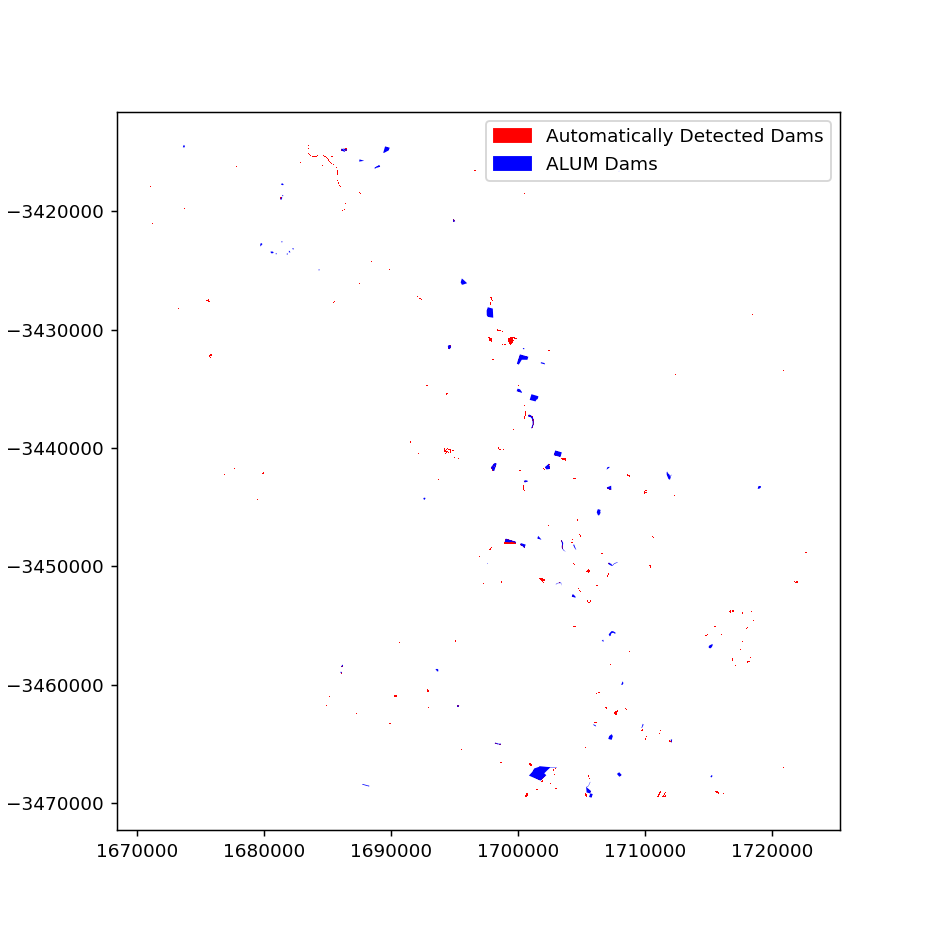

In [4]:
f, ax = plt.subplots(1, figsize=(7, 7))

Our = OurDams.plot(ax=ax, color='r', )
ALUM = ALUMDams.plot(ax=ax, color='b')

# Manually add a legend to the plot
red_patch = mpatches.Patch(color='r', label='Automatically Detected Dams')
blue_patch = mpatches.Patch(color='b', label='ALUM Dams')
plt.legend(handles=[red_patch, blue_patch])

## Find where polygons overlap between the two shapefiles

In [5]:
data = []
for index, orig in OurDams.iterrows():
    for index2, ref in ALUMDams.iterrows():      
        if ref['geometry'].intersects(orig['geometry']): 
            data.append({'geometry':ref['geometry']})
MatchingDams = gp.GeoDataFrame(data,columns=['geometry'])

## Filter our validation layer for size

The automatic detection polygons were filtered based on size. We need to apply the same filter to the validation dataset so that we are comparing like with like

In [6]:
DamAreas = []
for i, Dam in ALUMDams.iterrows():
    polyArea = Polygon(Dam['geometry']).area
    Dam['area'] = polyArea
    DamAreas.append(Dam)
    
AreasIndex = [i for i, x in enumerate(DamAreas) if x['area'] > 5050]
BigDams = [DamAreas[x] for x in AreasIndex]
ValidationLayer = gp.GeoDataFrame(BigDams,columns=['geometry'])

## See how we did

<IPython.core.display.Javascript object>


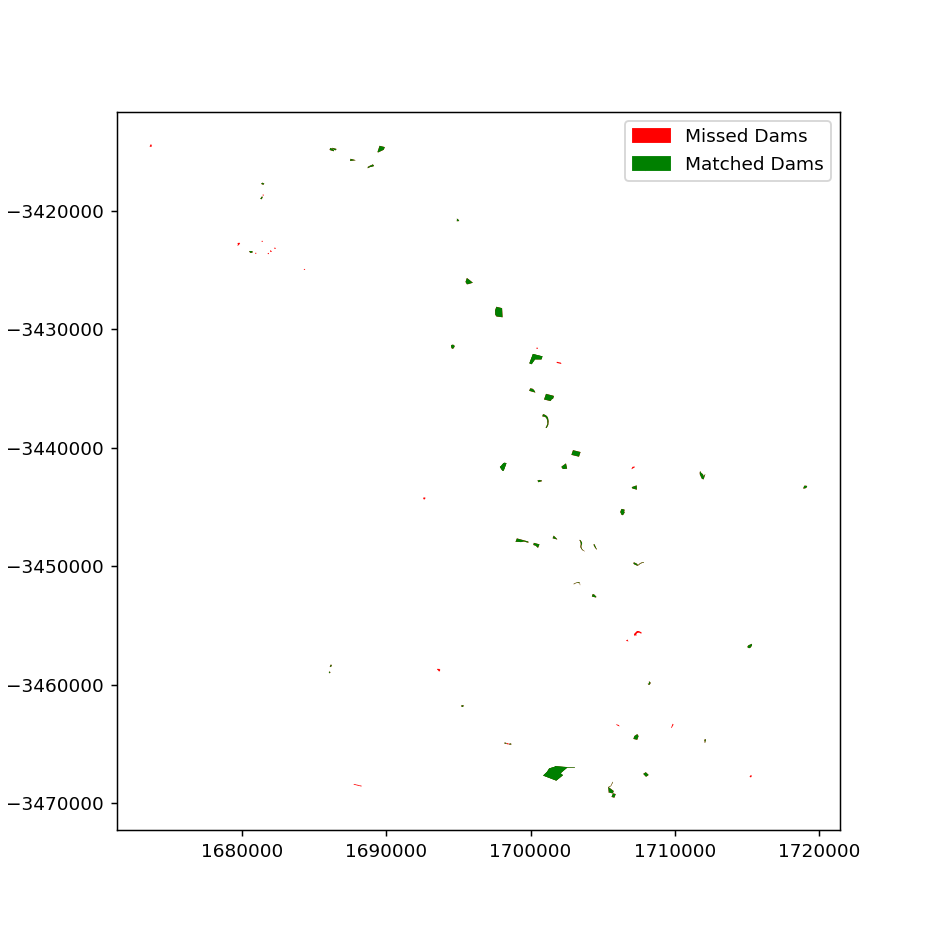

In [7]:
f, ax = plt.subplots(1, figsize = (7, 7))
ValidationLayer.plot(ax = ax, color = 'r')
MatchingDams.plot(ax = ax, color = 'g')

# Manually add a legend to the plot
red_patch = mpatches.Patch(color='r', label='Missed Dams')
blue_patch = mpatches.Patch(color='g', label='Matched Dams')
plt.legend(handles=[red_patch, blue_patch])

### Calculate the accuracy of the automatic detection method

In [8]:
print('True_Positive_Rate = %.2f' % (MatchingDams.size / ValidationLayer.size))

True_Positive_Rate = 0.71
